In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_methodology.pdf
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_answer_choices.pdf


# Imports

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [3]:
# import data
df = pd.read_csv("/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# We remove the first row of the data set because it

data = df.iloc[1:,:]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 1 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 1 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


In [6]:
data.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
count,25973,25973,25973,25973,25973,25973,25973,21860,5334,10756,...,633,591,4239,729,737,1020,666,2747,4542,377
unique,5409,11,5,66,7,15,7,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,484,25-29,Man,India,Master’s degree,Student,1-3 years,Python,R,SQL,...,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,ClearML,Domino Model Monitor,MLflow,None,Other
freq,42,4931,20598,7434,10132,6804,7874,21860,5334,10756,...,633,591,4239,729,737,1020,666,2747,4542,377


# EDA

* we have 25973 row with 369 feature all classified as object features
* There are question that have multiple choice 
* each choise have its column 

## What is the age of the participants - Age Group

let's see what are the age groups who participated in the survey

In [7]:
labels = list(data.Q1.value_counts().index)
values = list(data.Q1.value_counts())
labels, values

(['25-29',
  '18-21',
  '22-24',
  '30-34',
  '35-39',
  '40-44',
  '45-49',
  '50-54',
  '55-59',
  '60-69',
  '70+'],
 [4931, 4901, 4694, 3441, 2504, 1890, 1375, 964, 592, 553, 128])

In [8]:
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

We can obviously see that majority of Kagglers (37,9%) are between 21 to 29 years of age as 18,9% are between 28-21 & 19% are between 25-29.

Very few Kagglers are over the age of 50 (8,61%)

## Participants Gender

In [9]:
labels = list(data.Q2.value_counts().index)
values = list(data.Q2.value_counts())
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.2, 0.1, 0.2, 0.2, 0.2], hole=.3, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

<AxesSubplot:xlabel='Q2', ylabel='count'>

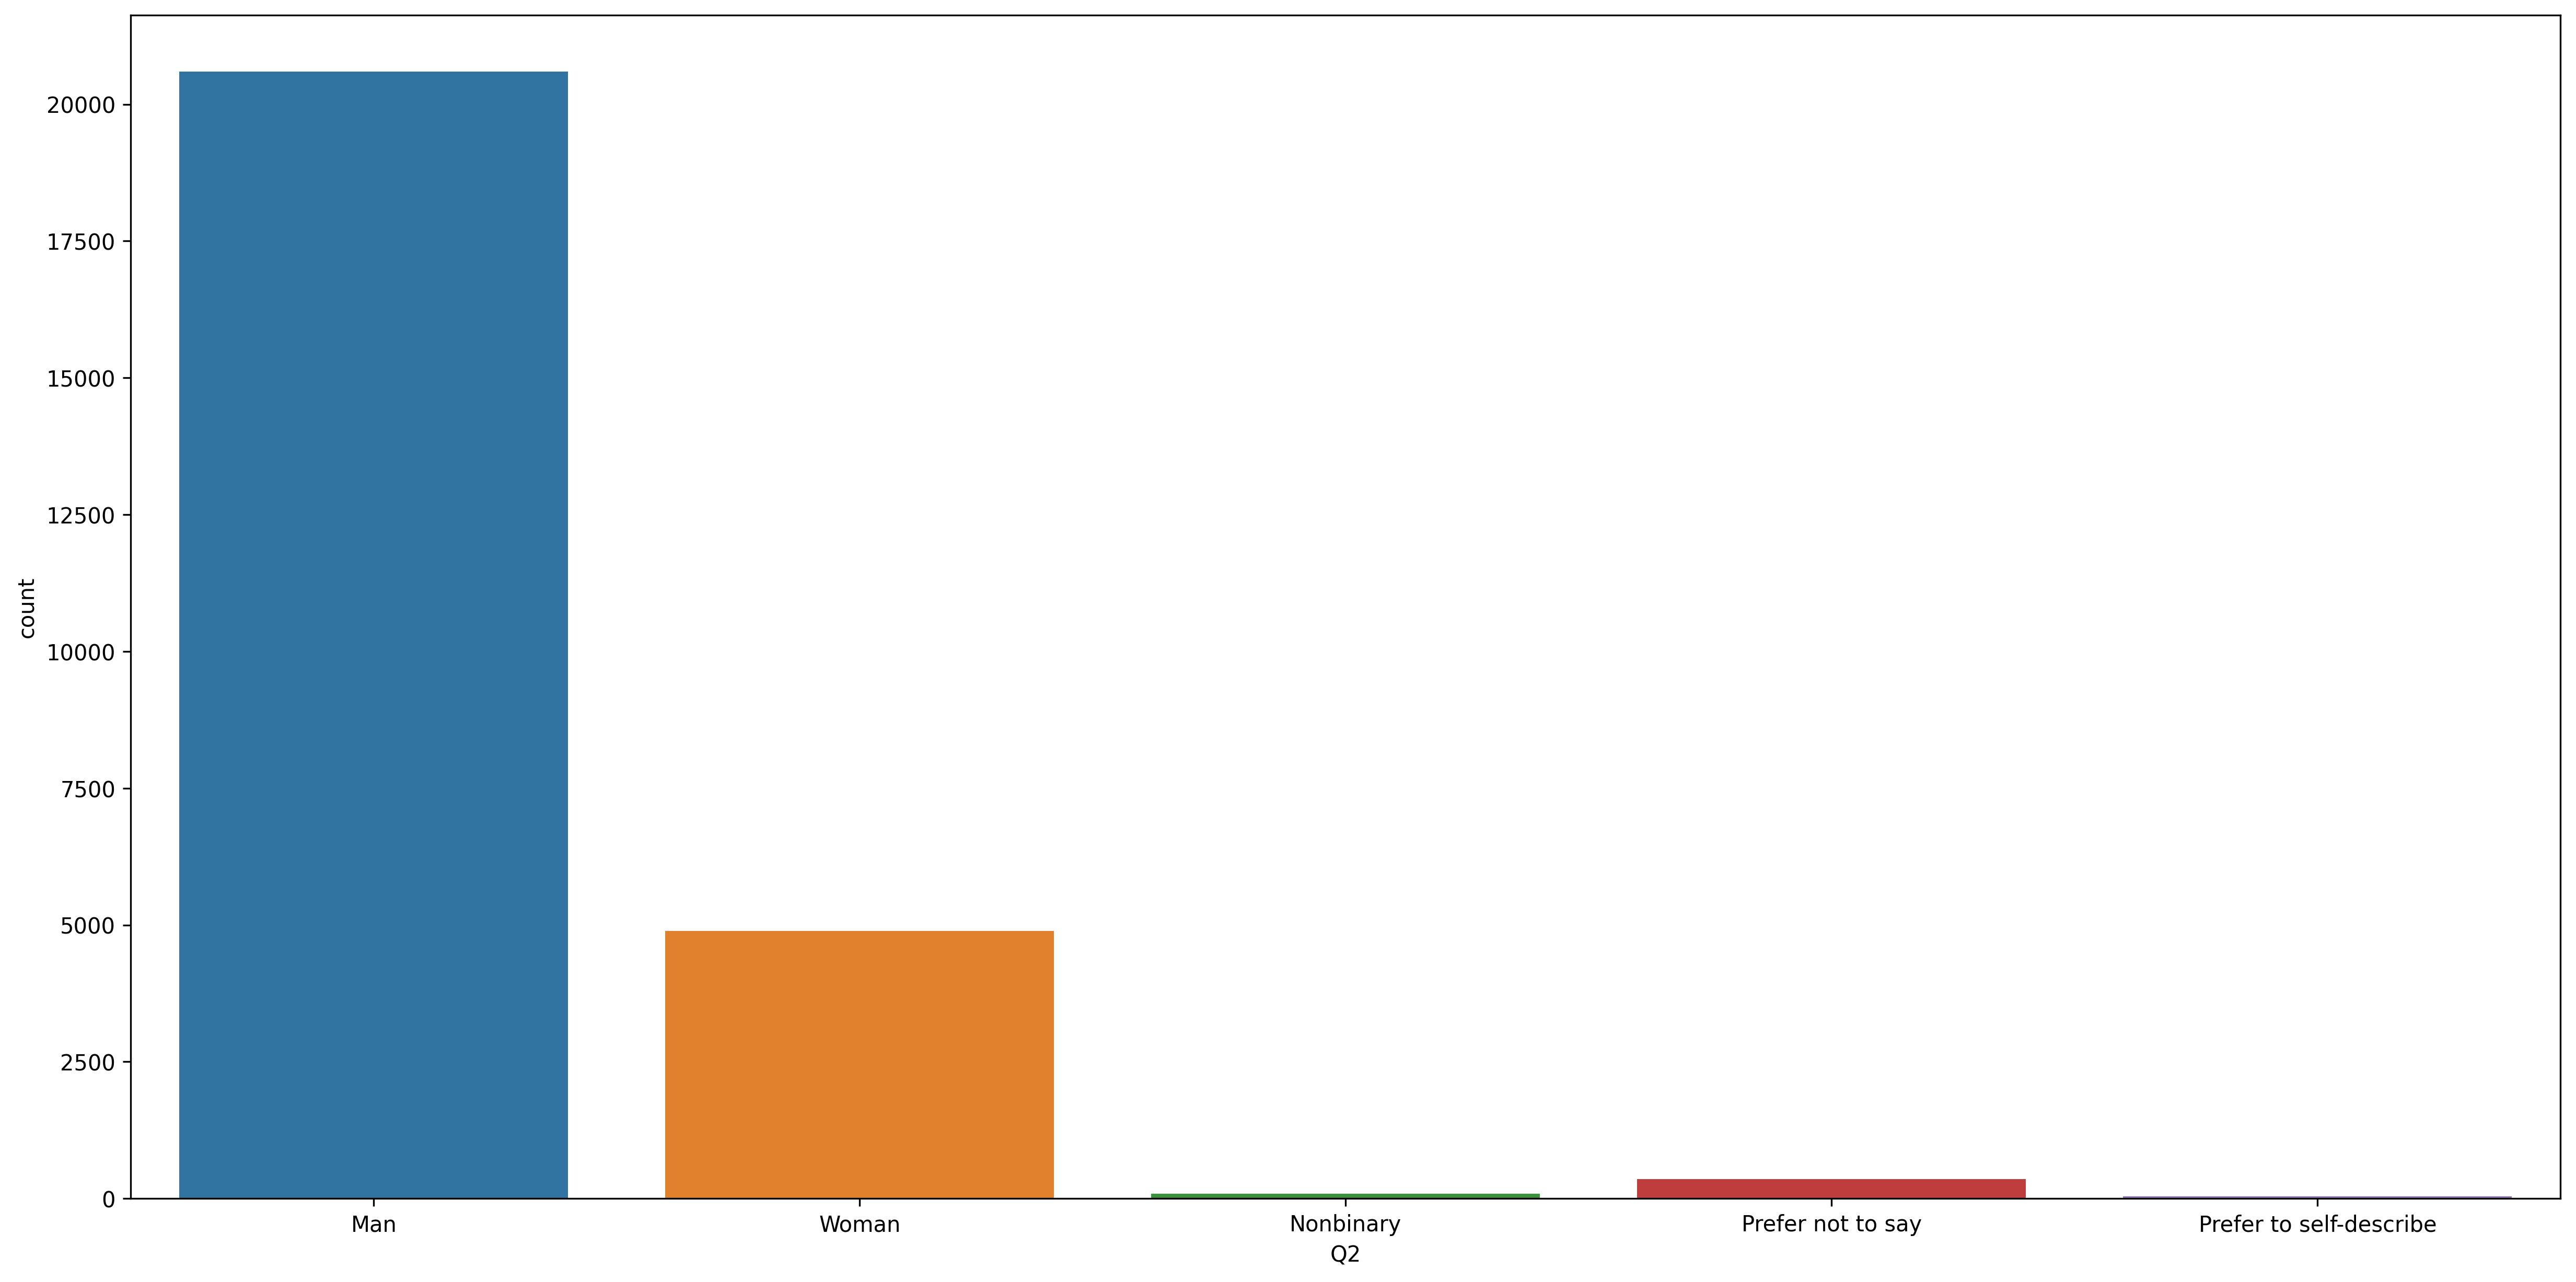

In [10]:
plt.figure(figsize= (20, 10), dpi= 300)
sns.countplot(x= 'Q2', data= data)

Hmmm, 2021's survey is dominanted by men, they are almost 80% of the participants .

There are also 18% Women Kagglers. The ratio is not that bad, but it can be improved upon.

Finally, about 2% are either Non-Bianary, Do not wish to disclose or Prefer to self explain.

<AxesSubplot:xlabel='Q1', ylabel='count'>

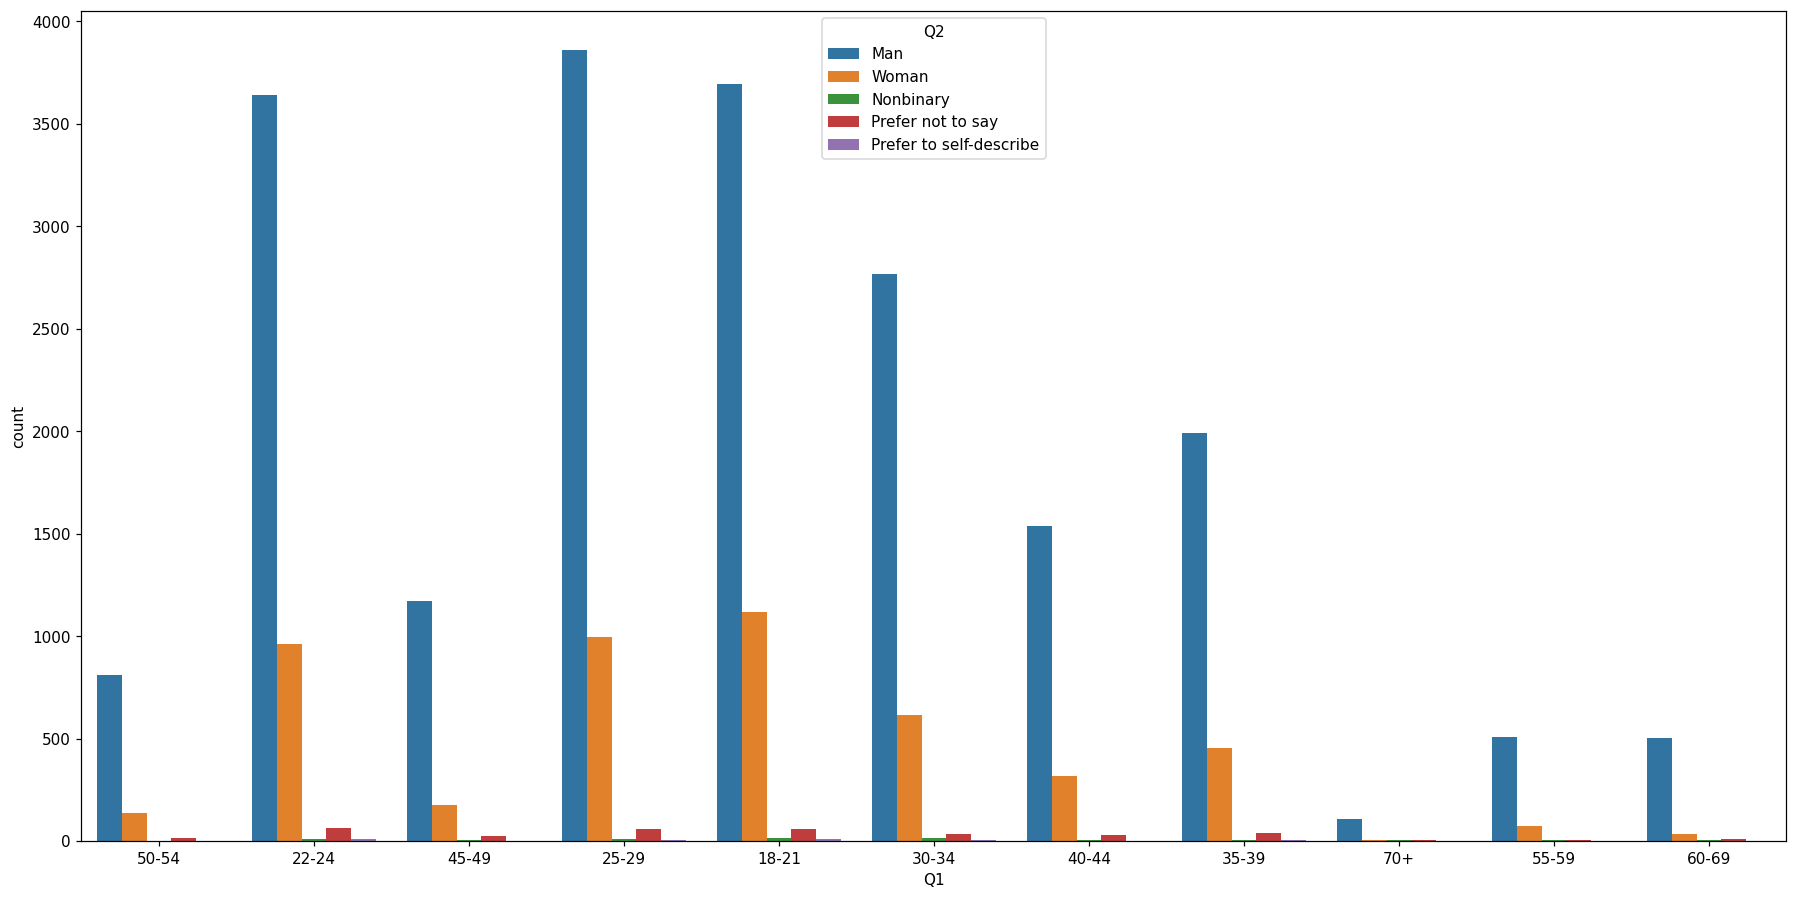

In [11]:
### Let's see the age group based on sex of the participants
plt.figure(figsize= (20, 10), dpi= 110)
sns.countplot(x= 'Q1', data= data, hue= 'Q2')

* Even with the age groups, Men are always dominants then Women. 
* if we look more deeper, woman that are 18-21 years old age range, is much higher than other age range. 
* age groupe between 30 to 50 years old are declining clearly in population. 
* It seems that these people are the one who were early practitioners of the modern Machine Learning and Data Science.

## Where are the participants from?

<AxesSubplot:xlabel='count', ylabel='Q3'>

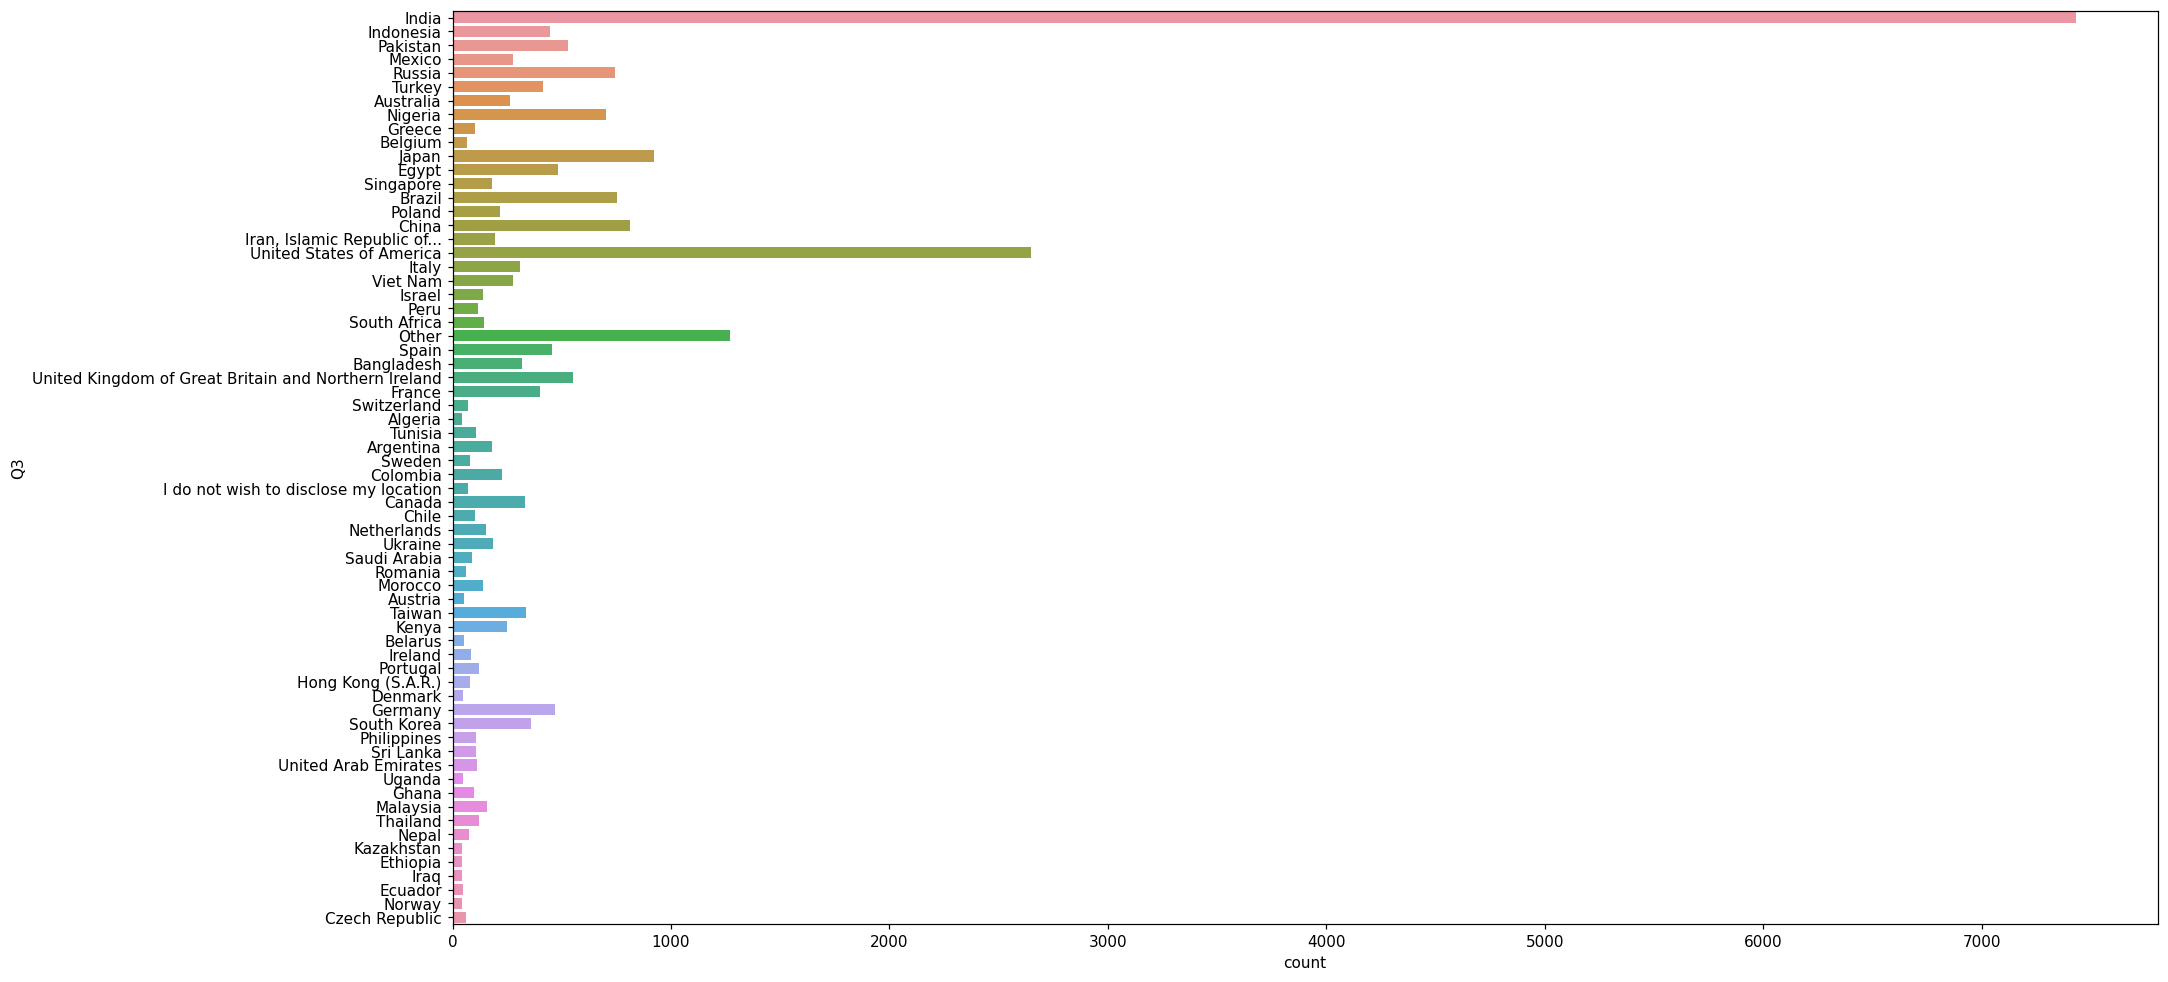

In [12]:
plt.figure(figsize= (20, 11), dpi= 110)
sns.countplot(y ='Q3', data = data)

most of the participants live in India, USA, Japan, Russia, Brazil, Uk,China.

Very less number of the participants are from from Norway, Algeria, Ehiopia and Denmark.

**Morocco** is the first country amoung North africa participants

## What is the highest level of formal education for the participants

In [13]:
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='count', ylabel='Q4'>

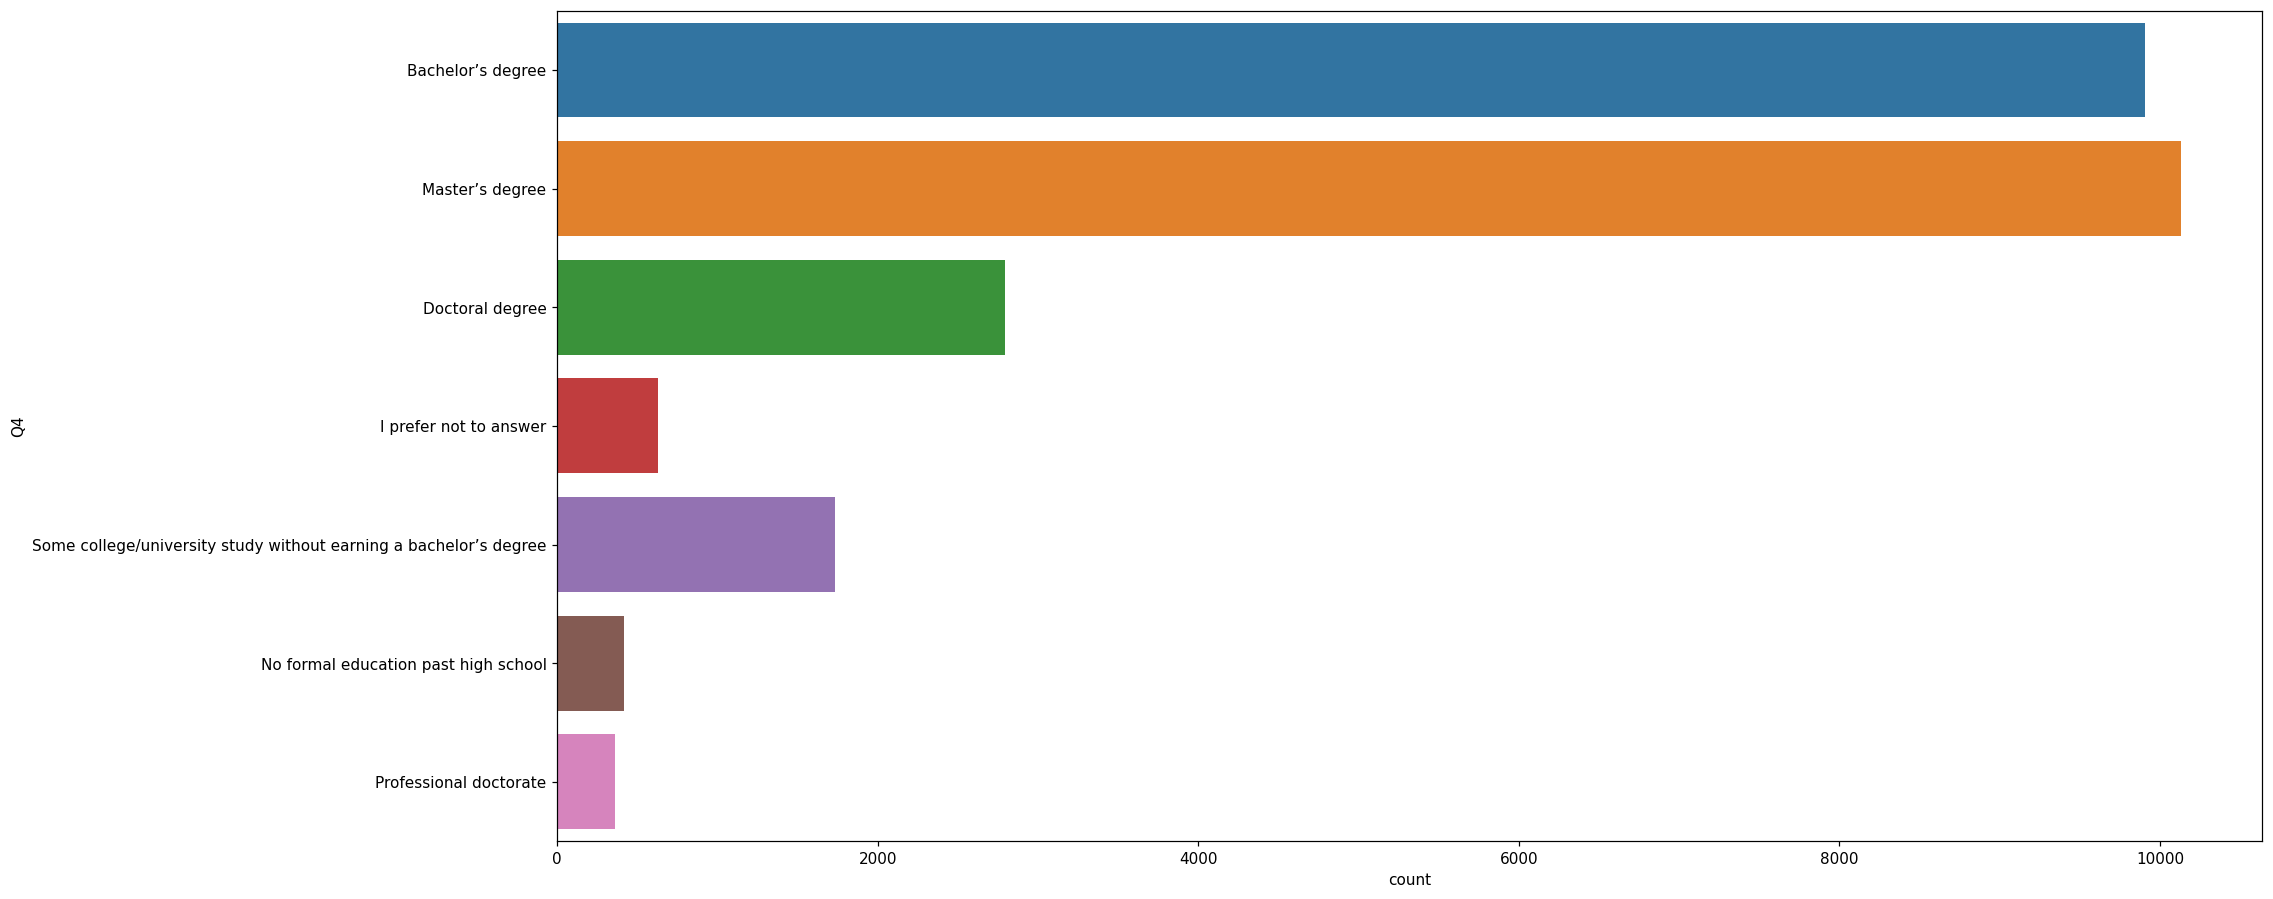

In [14]:
plt.figure(figsize= (20, 10), dpi= 110)
sns.countplot(y= 'Q4', data= data)

<AxesSubplot:xlabel='count', ylabel='Q4'>

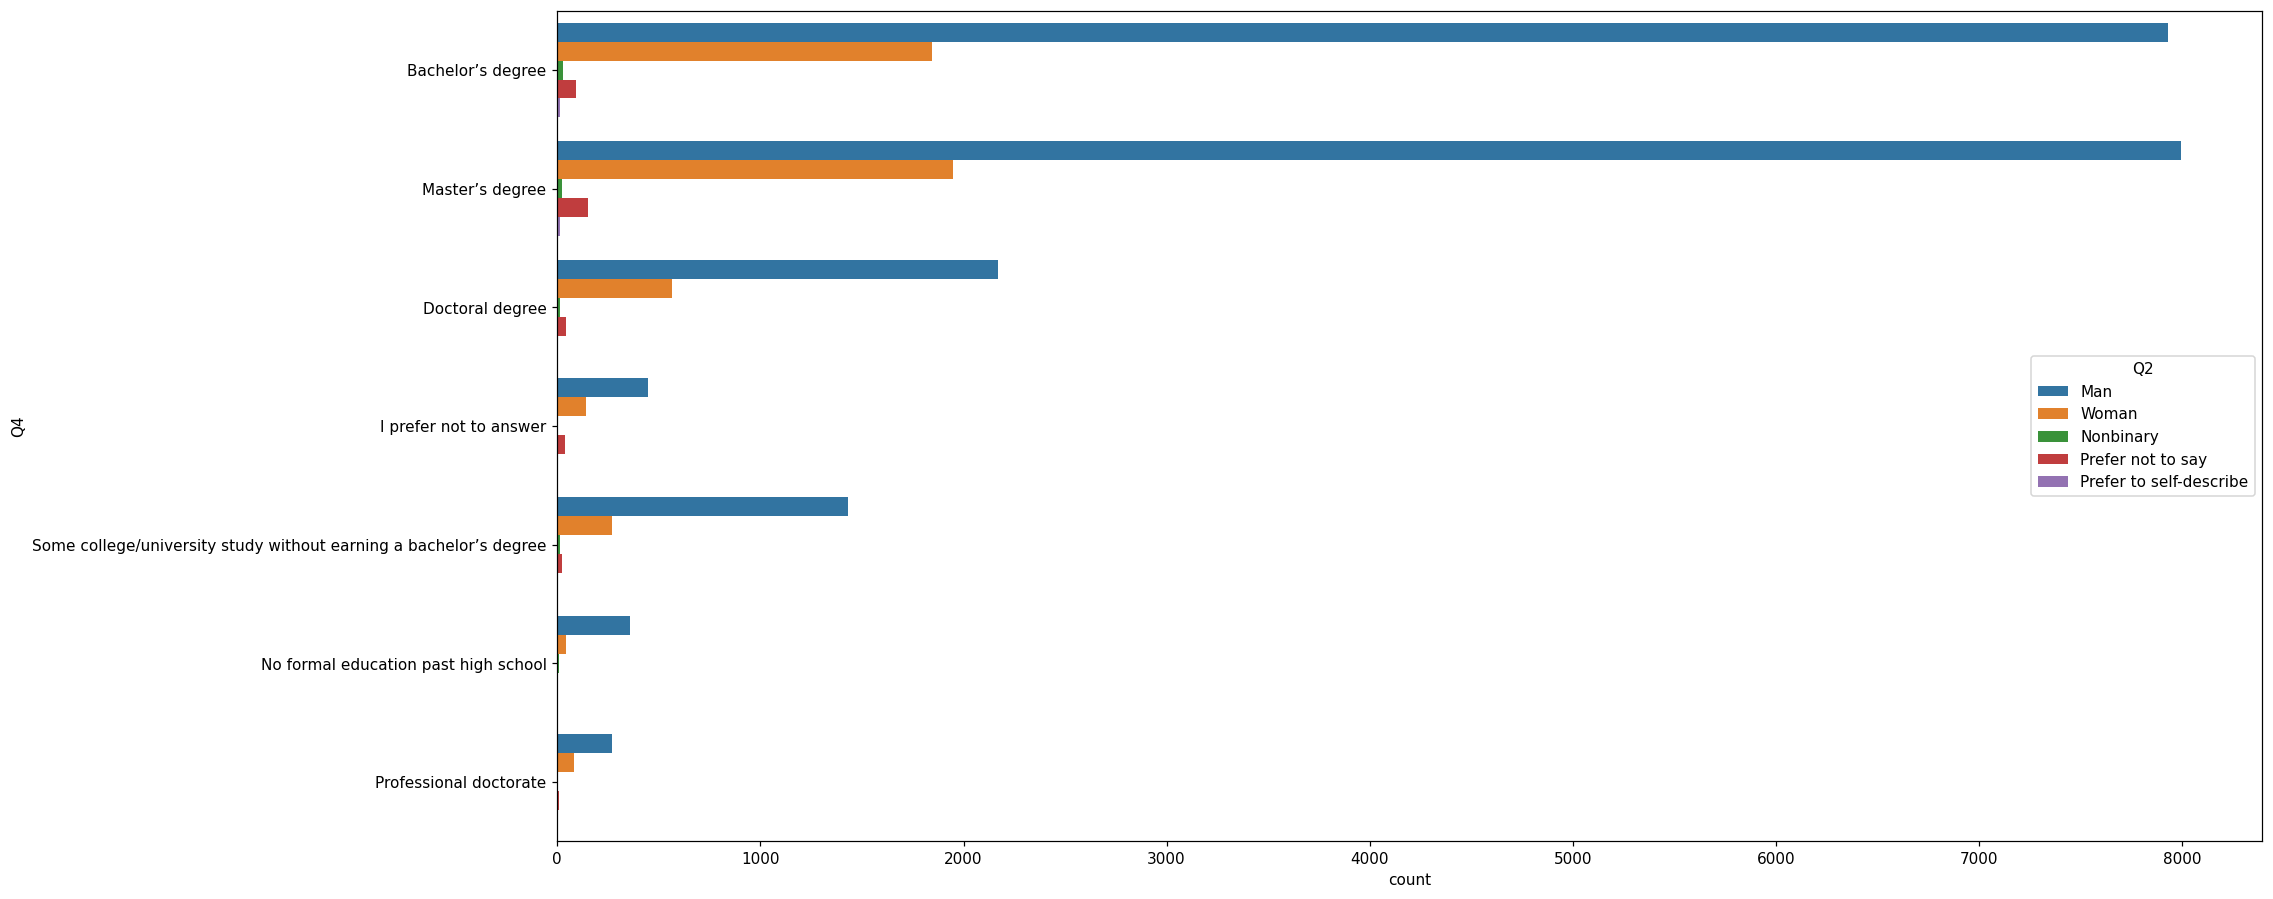

In [15]:
plt.figure(figsize= (20, 10), dpi= 110)
sns.countplot(y= 'Q4', data= data, hue="Q2")

Most of the participants either hold a Master's degree or a Bachelor's degree

## Participants Current Job

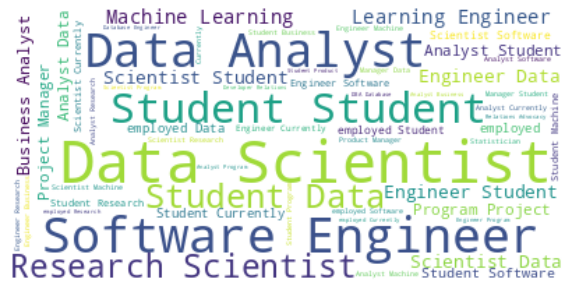

In [16]:
plt.figure(figsize= (10, 10))
# Create a word cloud of the current jobs
from wordcloud import WordCloud
#Creating the text variable
text = " ".join(job for job in data.Q5)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = True, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
labels = list(data.Q5.value_counts().index)
values = list(data.Q5.value_counts())
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0.1, 0.1, 0.1, 0.1], hole=.3, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

<AxesSubplot:xlabel='count', ylabel='Q5'>

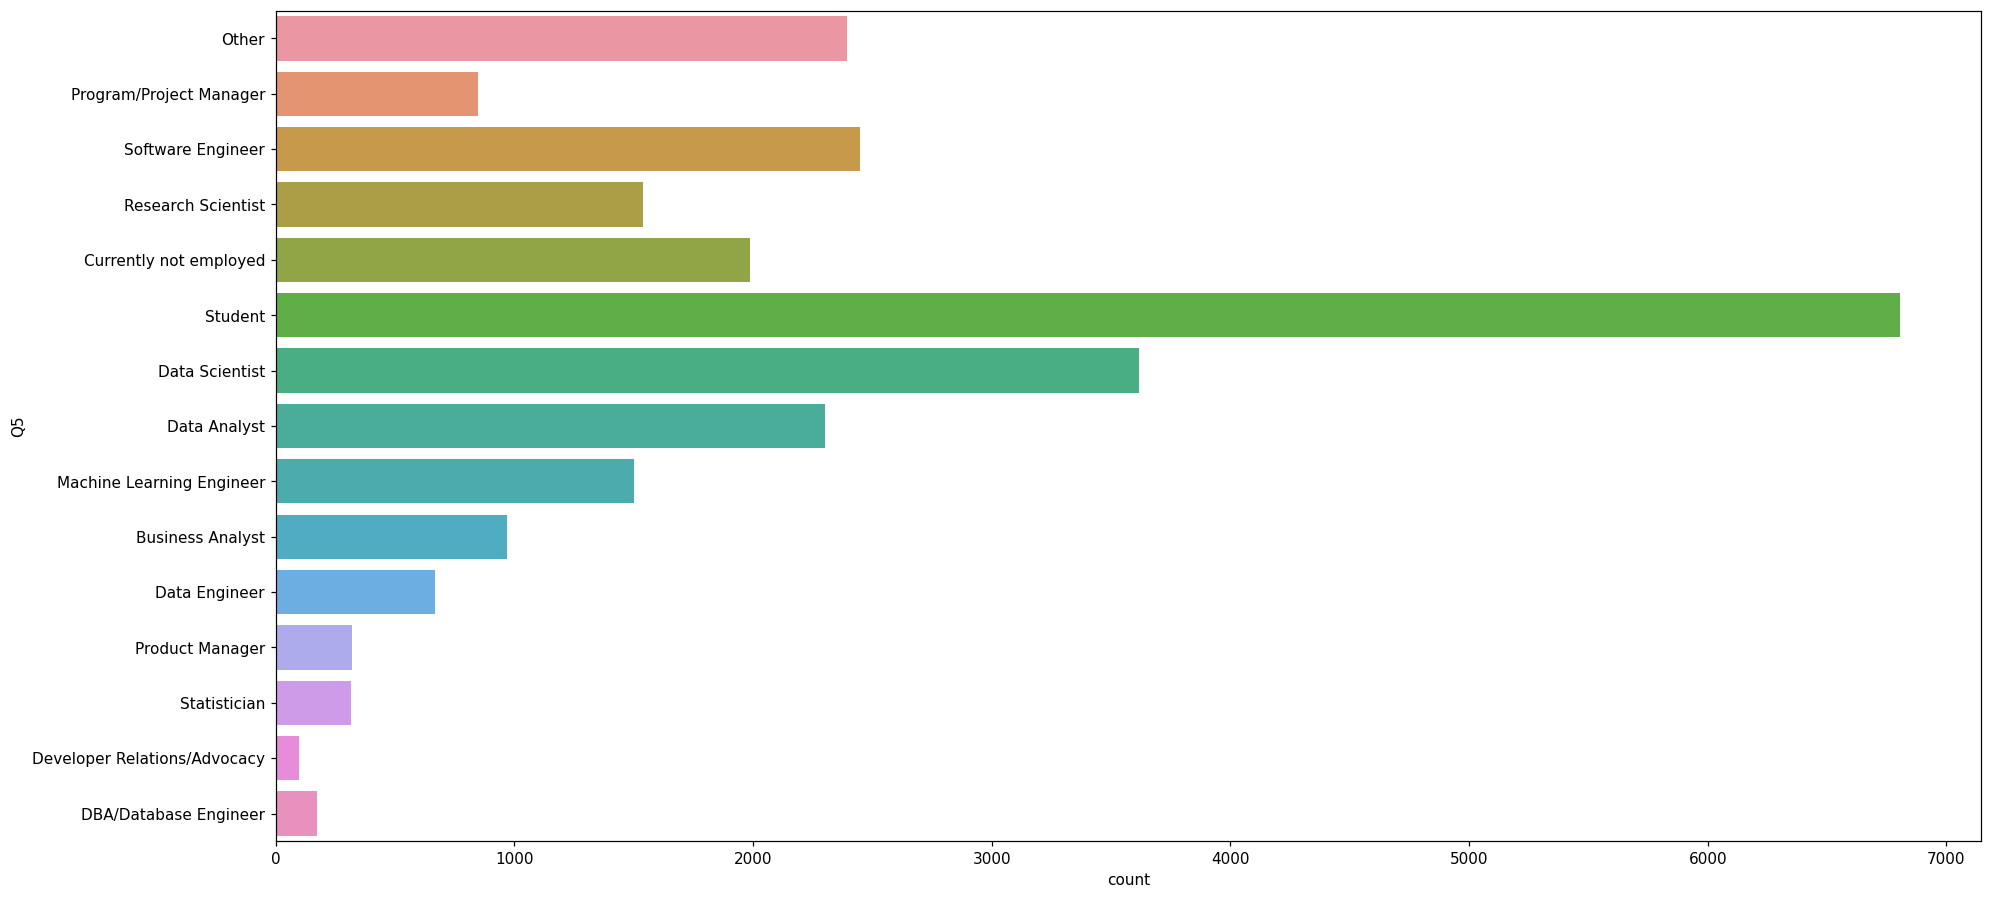

In [18]:
plt.figure(figsize= (20, 10), dpi= 110)
sns.countplot(y= 'Q5', data= data)

<AxesSubplot:xlabel='count', ylabel='Q5'>

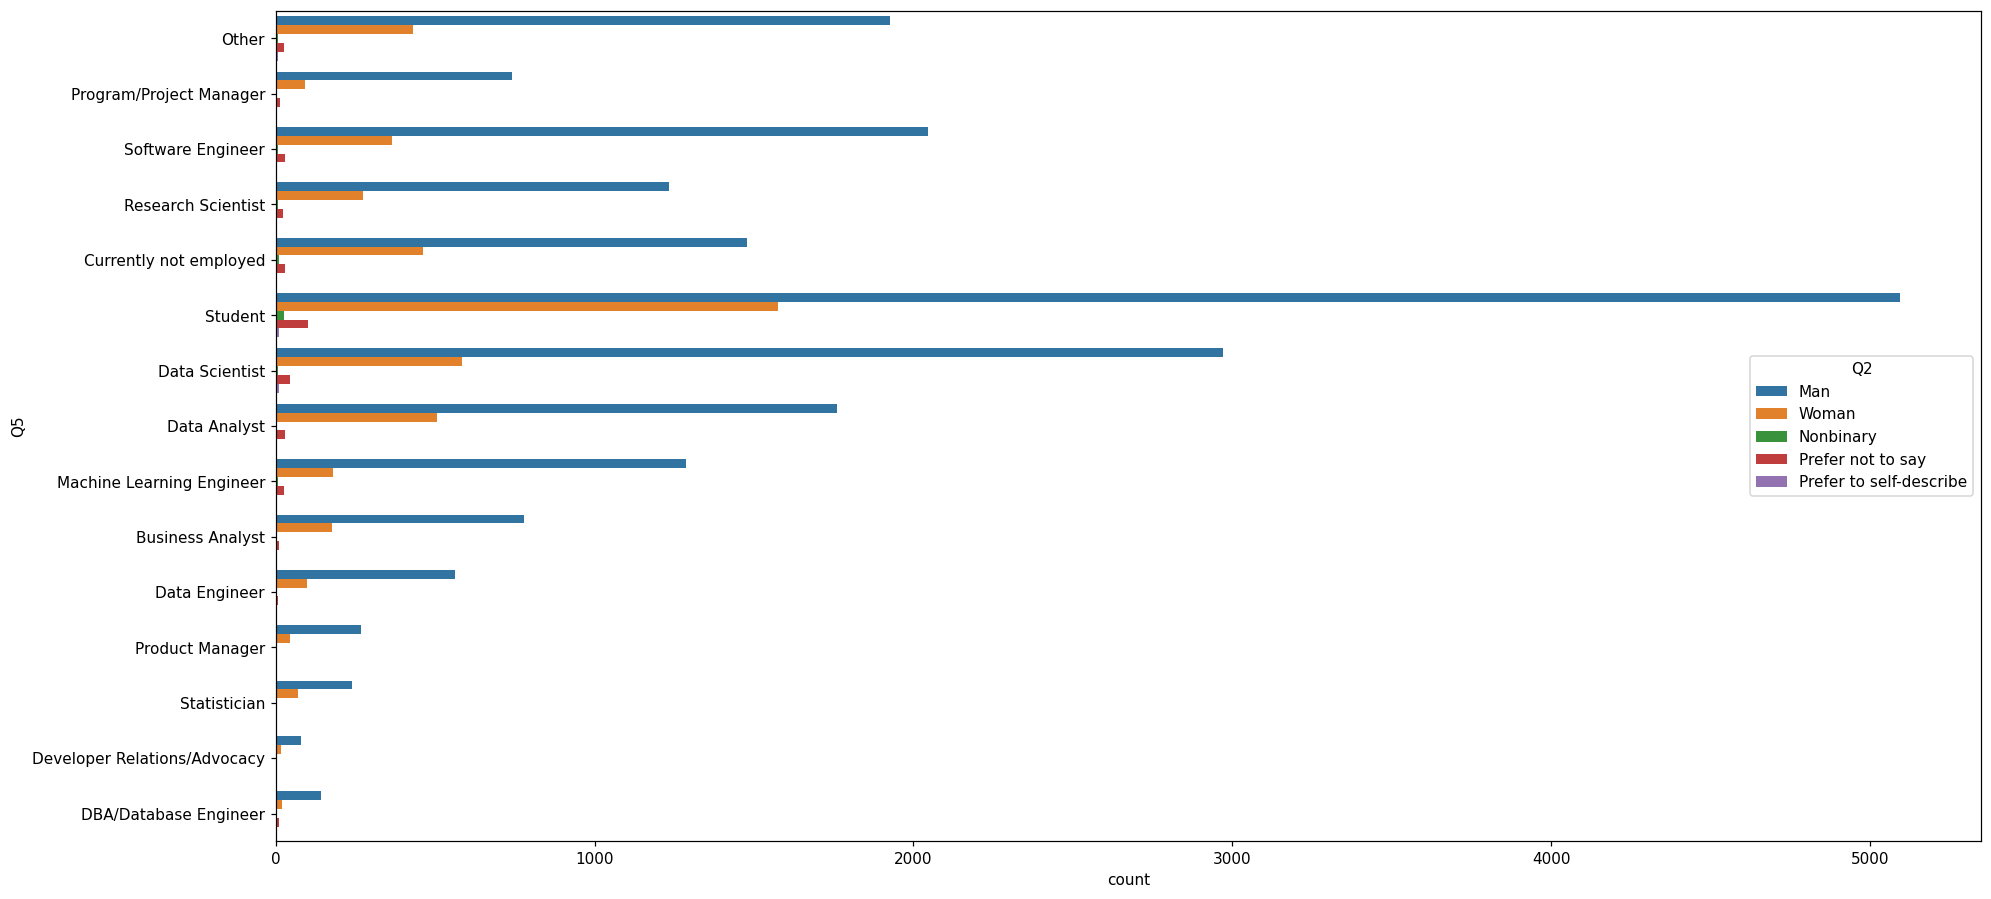

In [19]:
plt.figure(figsize= (20, 10), dpi= 110)
sns.countplot(y= 'Q5', data= data, hue="Q2")

<AxesSubplot:xlabel='count', ylabel='Q5'>

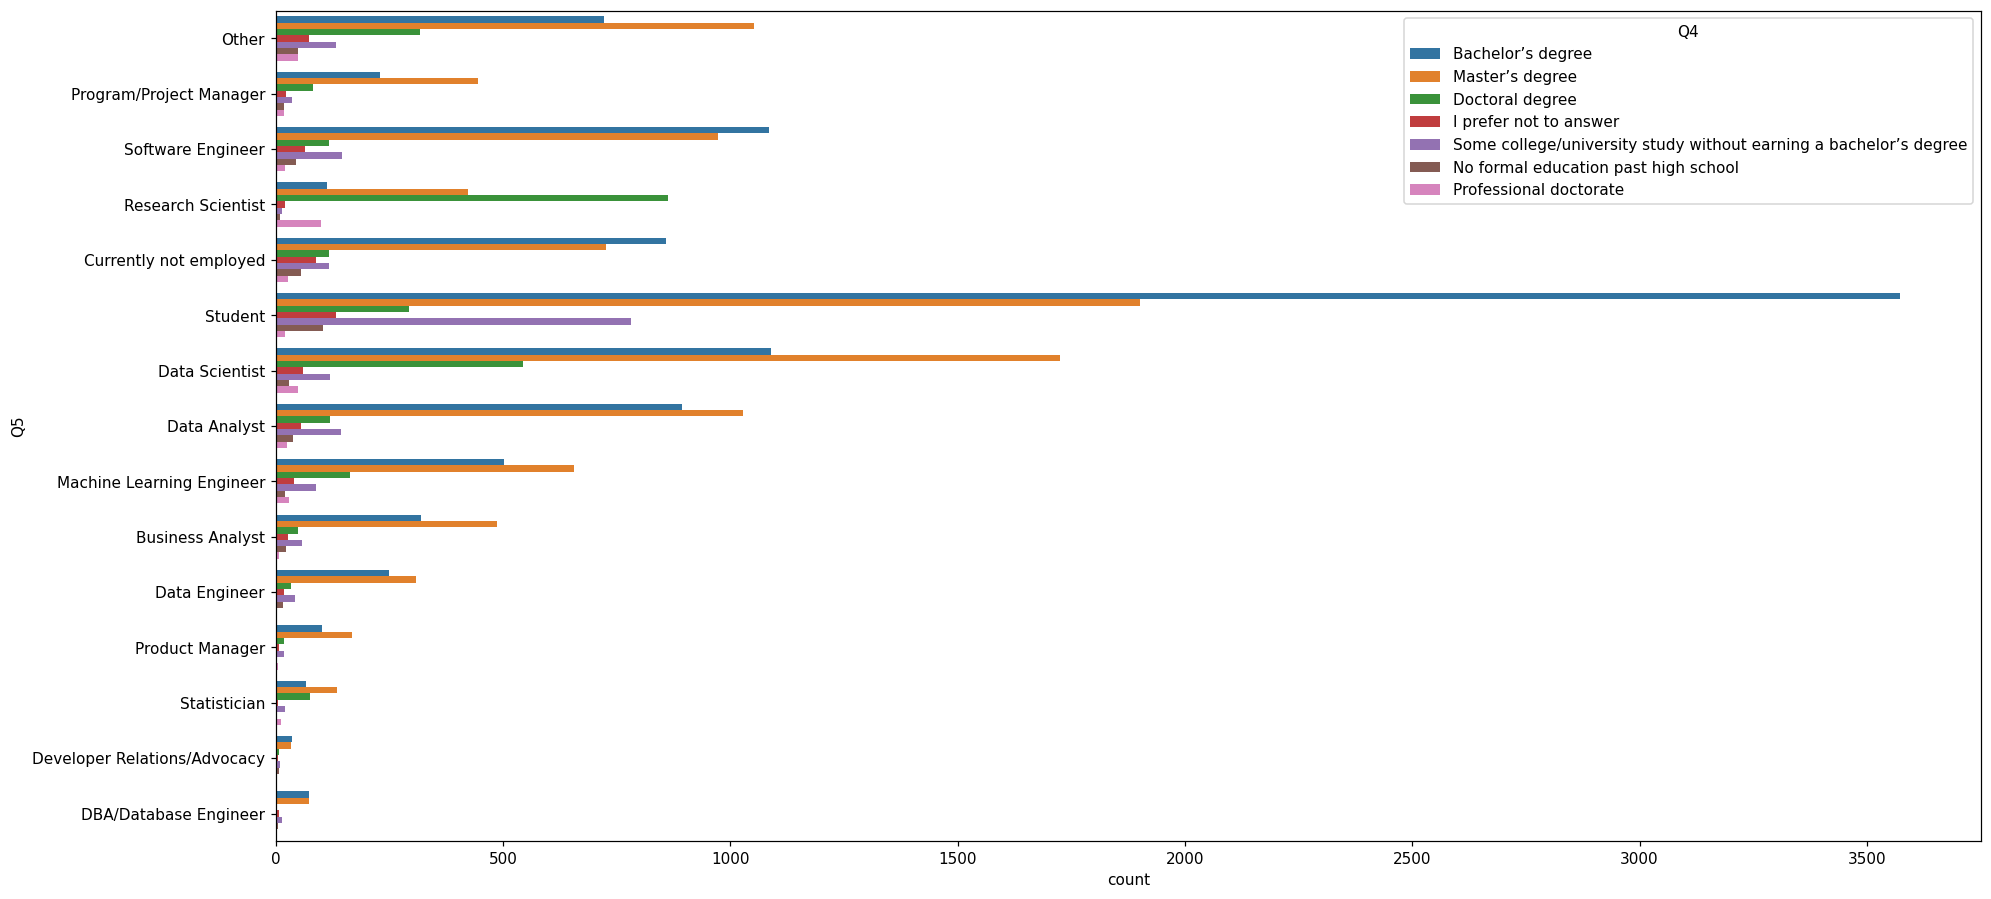

In [20]:
plt.figure(figsize= (20, 10), dpi= 110)
sns.countplot(y= 'Q5', data= data, hue="Q4")

Ooops, I was expecting that the most of the participants are Data Scientists/Analysts or ML Enginneers, however, we can see that majority of the participants are Students!

Therefore, Students, followed by Data Scientists, Software Engineers and Data Analysts are pre-dominantly the main professions in Kaggle.

Most of the participants have 3 principal educational paths, whether a Bachelor, Master, or Doctoral degrees

Notice that data jobs ( Data Scientists/Analysts, ML enginners and statisticians ) are tend to have a master degree

## For how many years have the participants been writing code ?

In [21]:
labels = list(data.Q6.value_counts().index)
values = list(data.Q6.value_counts())
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

<AxesSubplot:xlabel='count', ylabel='Q6'>

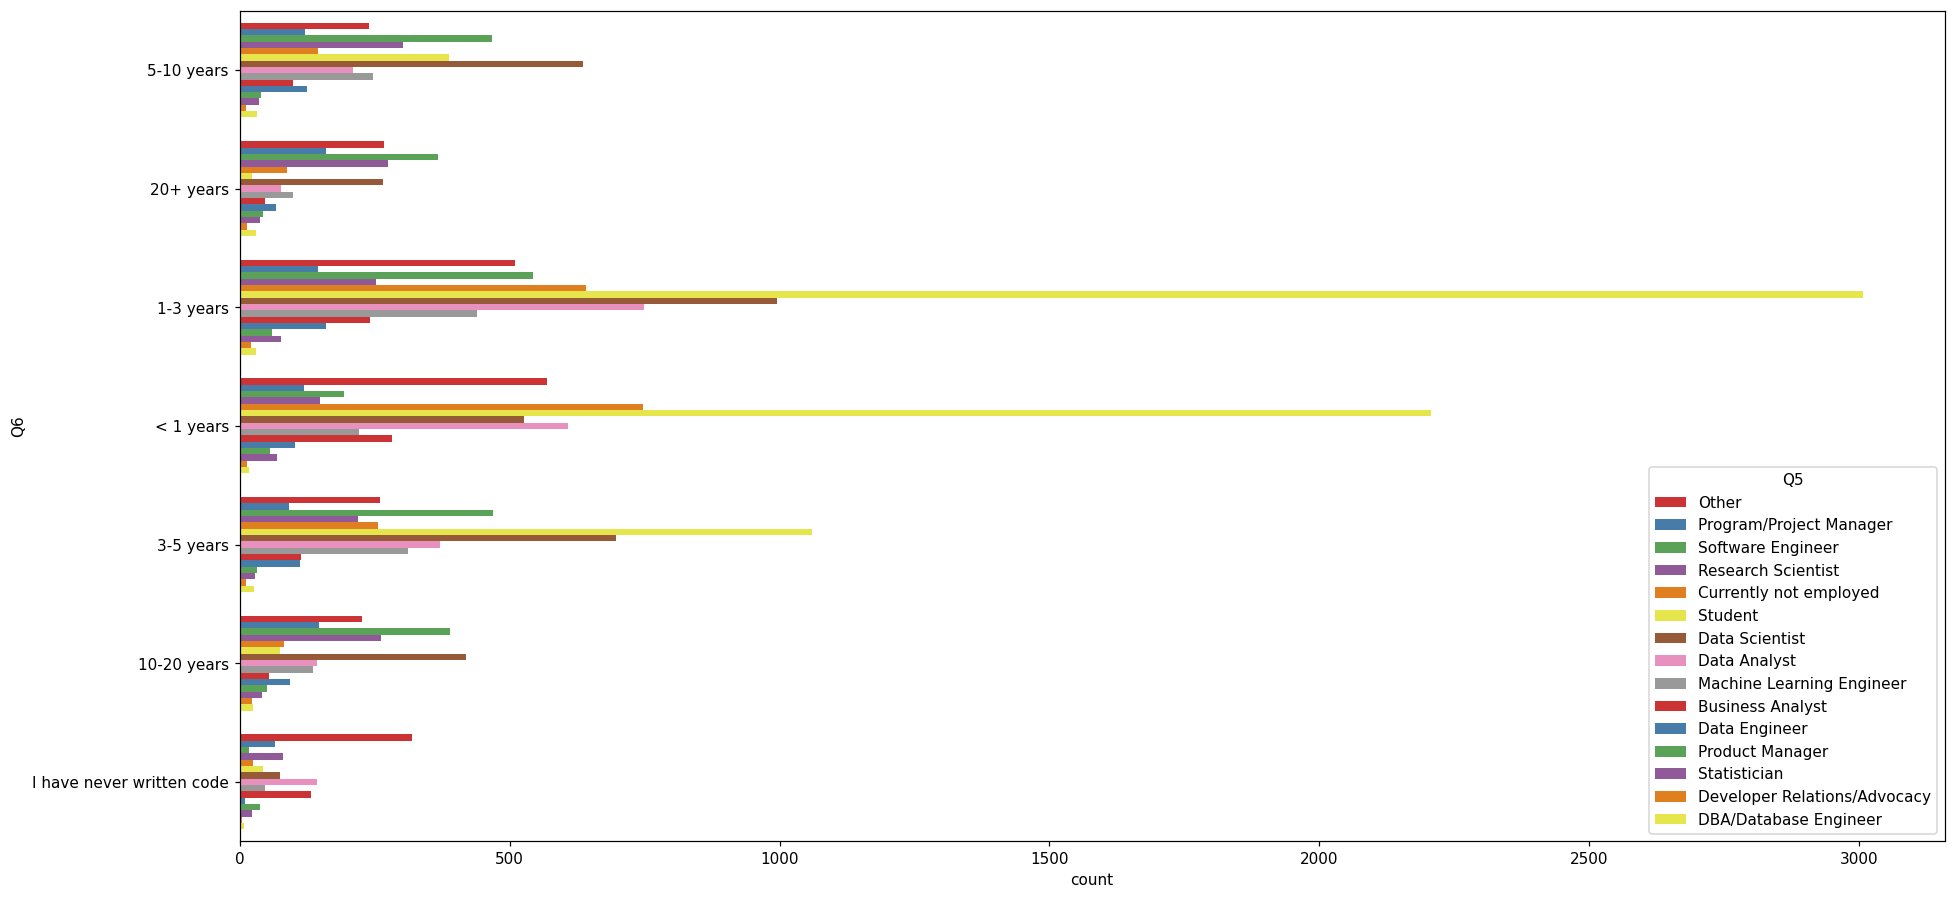

In [22]:
plt.figure(figsize= (20, 10), dpi= 110)
sns.countplot(y= 'Q6', data= data, hue="Q5", palette="Set1")

<AxesSubplot:xlabel='count', ylabel='Q6'>

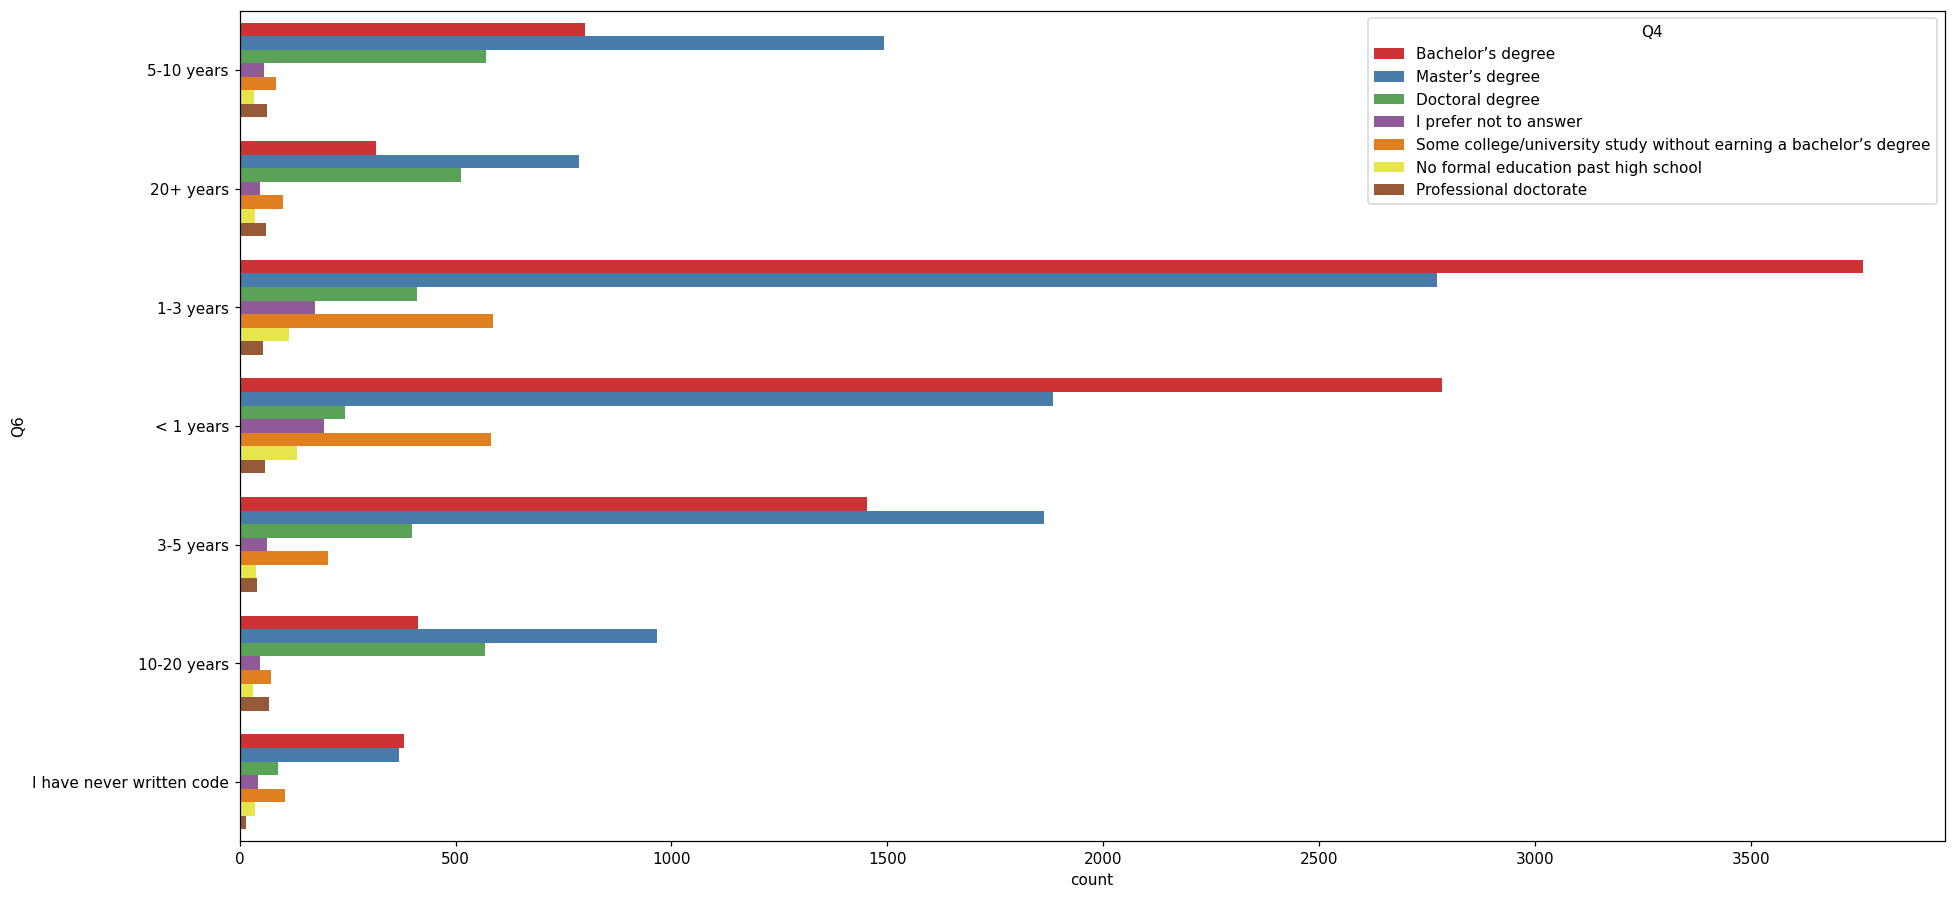

In [23]:
plt.figure(figsize= (20, 10), dpi= 110)
sns.countplot(y= 'Q6', data= data, hue="Q4", palette="Set1")

<AxesSubplot:xlabel='count', ylabel='Q6'>

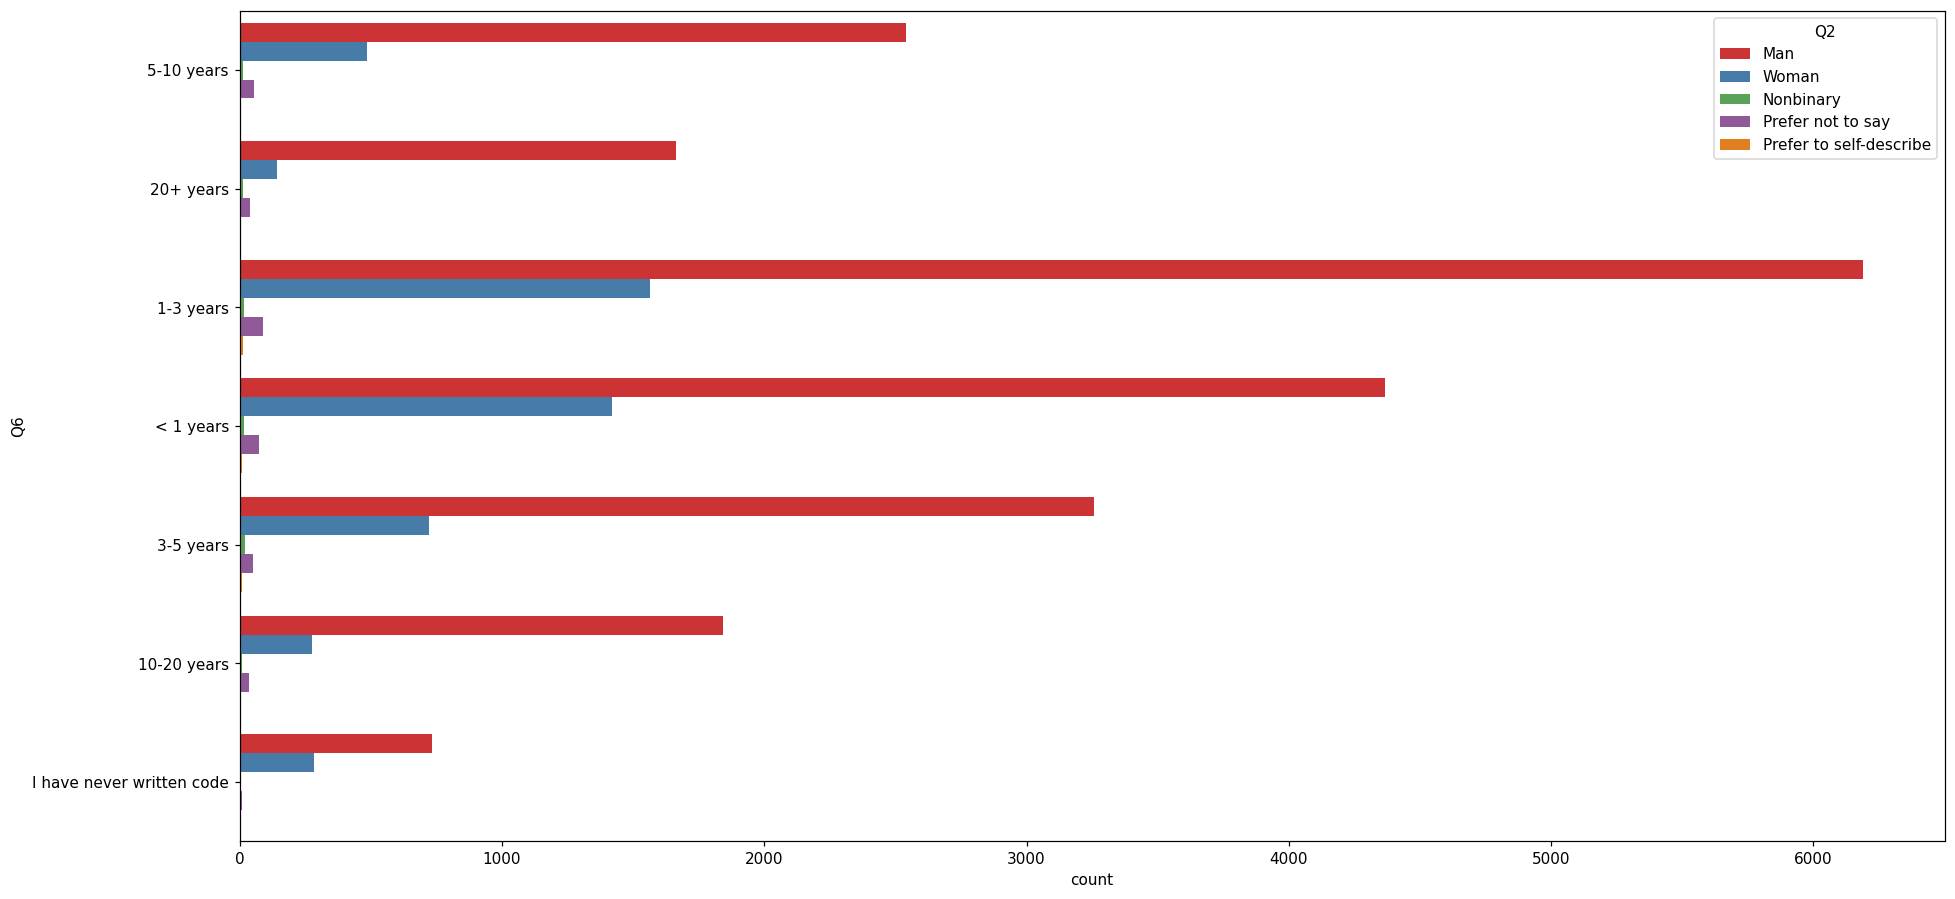

In [24]:
plt.figure(figsize= (20, 10), dpi= 110)
sns.countplot(y= 'Q6', data= data, hue="Q2", palette="Set1")

The participants are most likely to having 1-3 years of writting code experience (30%), dominantly by men and bachelor/master degrees. 

Most interesting that there are 7.16% with experience more than 20 years. These people are the gurus of data science and machine learning. **Much Respect** 

Surprisingly there are 3.97% that have never written any code